# Рахель Марк БПМ 161
# Лабораторная работа №5
# Вариант 19
# № 5.1.19

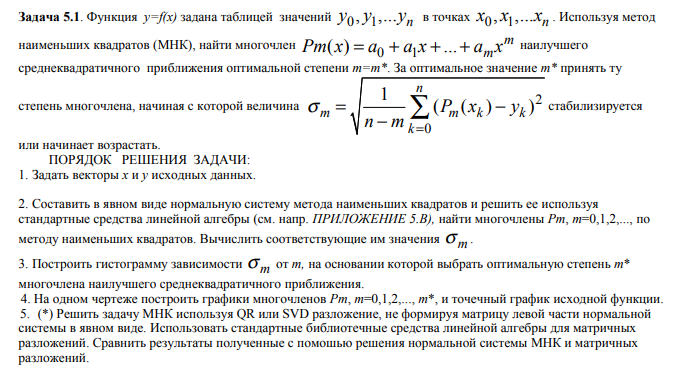

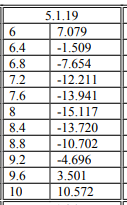

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.array([6, 6.4, 6.8, 7.2, 7.6, 8, 8.4, 8.8, 9.2, 9.6, 10])
y = np.array([7.079, -1.509, -7.654, -12.211, -13.941, -15.117, -13.720, -10.702, -4.696, 3.501, 10.572])

Функция нахождения отклонения и функция для реализации метода наименьших квадратов:

In [3]:
def error(p, x, y, m):
    return np.linalg.norm(p(x) - y)/np.sqrt(len(x) - m)


def MNK(x, y, m):
    xj = np.array([x**j for j in range(0, m + 1)])
    b = xj@y
    matr = np.zeros((m + 1, m + 1))
    elem = xj.sum(axis = 1)
    for i in range (0, m + 1):
        matr[i,:] = elem
        elem = np.roll(elem, -1)
        elem[-1] = np.sum(x**(i+m+1))        
    return np.linalg.solve(matr, b)[::-1]

Найдем множество полиномов степени до n и их отклонения при помощи созданного метода:

In [4]:
polynoms = np.array([np.poly1d(MNK(x, y, m)) for m in range(0, len(x))])

errors = np.array([error(p, x, y, p.order) for p in polynoms])

Минимальная ошибка и степень полинома, соответствующая ей:

In [5]:
deg = errors.argmin()
print('Минимальная ошибка:', min(errors), ' Степень: ', deg)

Минимальная ошибка: 0.2297758043095785  Степень:  6


Оптимальной является степень 6, что будет продемонстрировано далее.

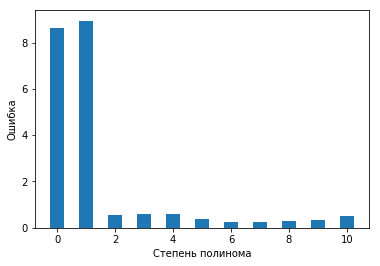

In [6]:
#Построим гистограмму величина оштбки от степени интерполяционного полинома:
fig, ax = plt.subplots()
ax.bar(range(0, len(polynoms)), errors, width=0.5)
ax.set_xlabel('Степень полинома');
ax.set_ylabel('Ошибка');

Рассмотрим теперь исходный точечный график и построим найденные полиномы:

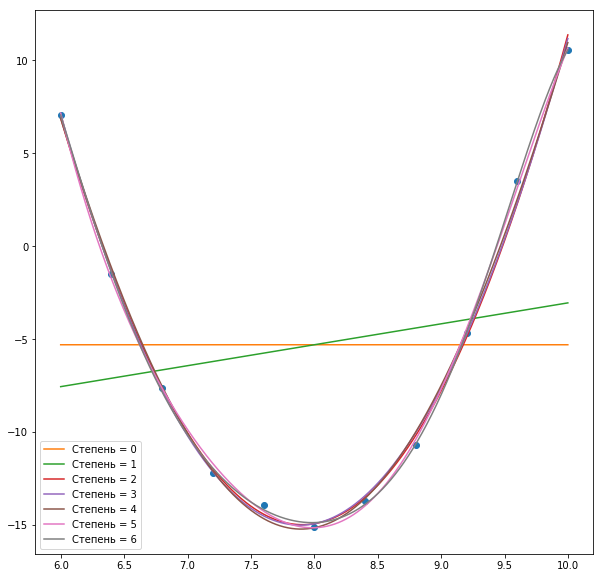

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y, 'o');
for i in range(0, deg + 1):
    ax.plot(np.arange(6, 10, 0.001), polynoms[i](np.arange(6, 10, 0.001)), label = "Степень = " + str(i))
    ax.legend()

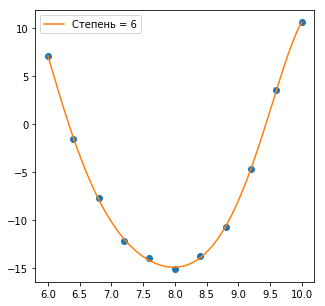

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y, 'o');
ax.plot(np.arange(6, 10, 0.001), polynoms[6](np.arange(6, 10, 0.001)), label = "Степень = 6")
ax.legend()

Как и ожидалось, оптимальный интерполянт проходит через все узлы.

# 5.3.8

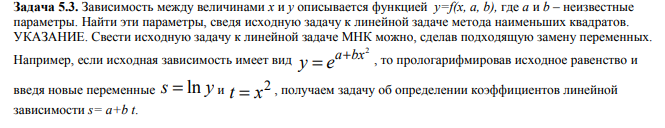

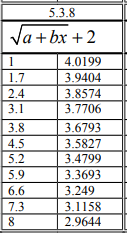

In [9]:
x = np.array([1, 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8])
y = np.array([4.0199, 3.9404, 3.8574, 3.7706, 3.6793, 3.5827, 3.4799, 3.3693, 3.249, 3.1158, 2.9644])

Произведем теперь замену $s = (y-2)^2, s=a+bx $

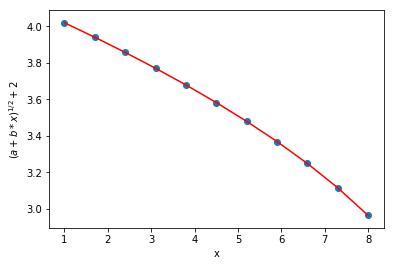

In [10]:
s=(y-2)**2
A = np.hstack([np.ones(len(x)).reshape(-1,1), x.reshape(-1,1)])
a,b = np.linalg.lstsq(A, s, rcond=None)[0]

plt.scatter(x,y)
plt.plot(x,((a + b * x)**(1/2)+2),c = 'r')
plt.xlabel('x')
plt.ylabel('$({a + b*x})^{1/2}+2$');

Полученные при этом параметры: 

In [11]:
print('Параметр a = ',a)
print('Параметр b = ',b)

Параметр a =  4.530026100324674
Параметр b =  -0.4500005562337661


In [12]:
print("Максимальное отклонение от верного ответа = ", max(np.abs(np.sqrt(a + b * x)+2 - y)))

Максимальное отклонение от верного ответа =  3.272684595279074e-05


# 5.5.2

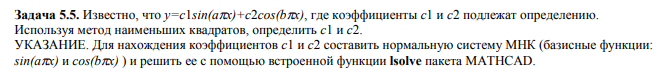

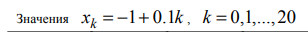

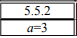

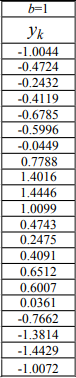

In [13]:
y = np.array([-1.0044, -0.4724, -0.2432, -0.4119, -0.6785, -0.5996, -0.0449, 0.7788, 1.4016, 1.4446, 1.0099, 0.4743, 0.2475, 0.4091, 0.6512, 0.6007, 0.0361, -0.7662, -1.3814, -1.4429, -1.0072])
x = -1 + 0.1*np.arange(21)
a = 3
b = 1

Сведем задачу к линейной, сделав замену

In [14]:
x_1 = np.sin(a*np.pi*x)
x_2 = np.cos(b*np.pi*x)
A = np.hstack([x_1.reshape(-1,1), x_2.reshape(-1,1)])
c1, c2 = np.linalg.lstsq(A, y, rcond=None)[0]
c1, c2

(-0.6003463994322735, 1.008462659733103)

Text(0, 0.5, '$c1*sin(a*\\pi*x)+c2*cos(b*\\pi*x$)')

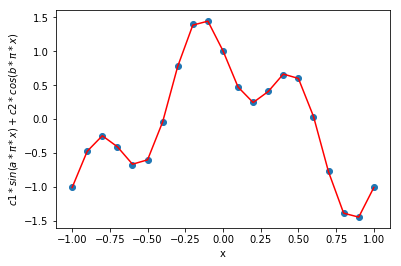

In [15]:
plt.scatter(x,y)
plt.plot(x,c1*x_1 + c2*x_2, c = 'r')
plt.xlabel('x')
plt.ylabel('$c1*sin(a*\pi*x)+c2*cos(b*\pi*x$)')

Максимальное отклонение: 

In [16]:
print("Максимальное отклонение от верного ответа = ", max(np.abs(c1*x_1 + c2*x_2 - y)))

Максимальное отклонение от верного ответа =  0.01477321486896277


# 5.8.1

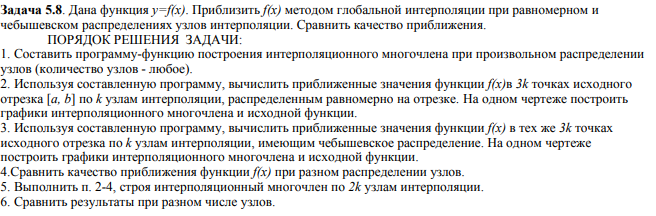

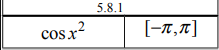

In [17]:
def f(x):
    return np.exp(np.cos(x**2))
a = -np.pi
b = np.pi

k = 20

Зададим соответствующие множества точек для $k$ и $3k$ узлов, а также для $k$ узлов, имеющих распределение Чебышева

In [18]:
X_3k = np.linspace(a, b, 3 * k)
Y_3k = f(X_3k)

X_k = np.linspace(a, b, k)
Y_k = f(X_k)

X_c = np.array([np.cos((2 * i + 1) / (2. * k) * np.pi) for i in range(k)]) * (b - a) * 0.5 + (b + a) * 0.5
Y_c = f(X_c)

Функция построения полиномов Лагранжа

In [19]:
def l_k(k, x, X):
    return np.prod([(x - Xj) / (X[k] - Xj) for Xj in X if X[k] - Xj != 0])

def L(x, X, Y):
    return np.sum ([Y[k] * l_k(k, x, X) for k in range(Y.shape[0])])

Построим графики и посчитаем максимальное отклонение

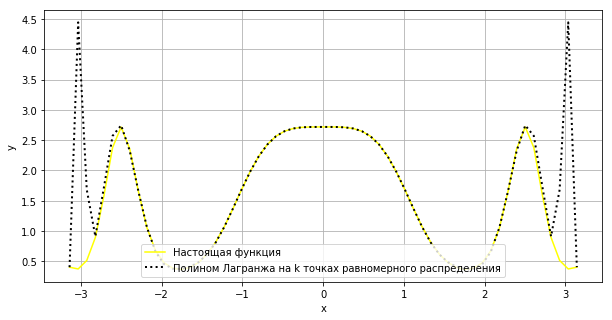

In [20]:
plt.figure(figsize = (10, 5))

plt.plot(X_3k, Y_3k, label = 'Настоящая функция', color = 'yellow')
L_Y = [L(x, X_k, Y_k) for x in X_3k]
plt.plot(X_3k, L_Y, label = 'Полином Лагранжа на k точках равномерного распределения', ls = ':', color = 'black', lw = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.grid()

In [21]:
np.max(np.abs(Y_3k - L_Y))

4.066406357863711

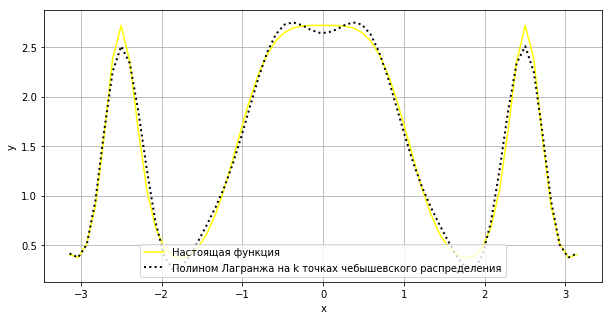

In [22]:
plt.figure(figsize = (10, 5))
plt.plot(X_3k, Y_3k, label = 'Настоящая функция', color = 'yellow')
L_Y = [L(x, X_c, Y_c) for x in X_3k]
plt.plot(X_3k, L_Y, label = 'Полином Лагранжа на k точках чебышевского распределения', ls = ':', color = 'black', lw = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.grid()

In [23]:
np.max(np.abs(Y_3k - L_Y))

0.20936836429464245

Повторим все для $2k$ узлов

In [24]:
X_2k = np.linspace(a, b, 2 * k)
Y_2k = f(X_2k)

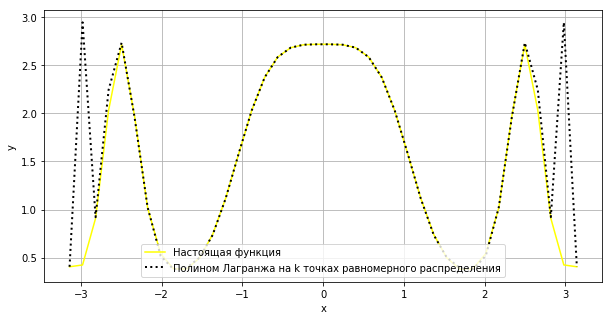

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(X_2k, Y_2k, label = u'Настоящая функция', color = 'yellow')
L_Y = [L(x, X_k, Y_k) for x in X_2k]
plt.plot(X_2k, L_Y, label = u'Полином Лагранжа на k точках равномерного распределения', ls = ':', color = 'black', lw = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.grid()

In [26]:
np.max(np.abs(Y_2k - L_Y))

2.5217332113124

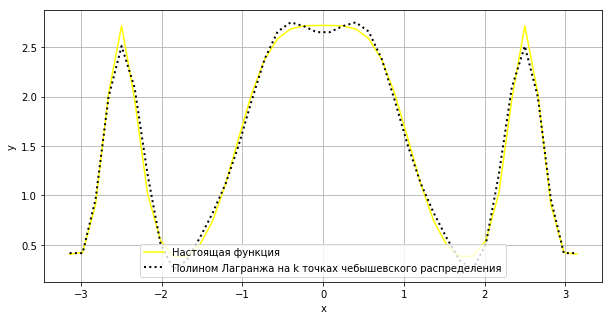

In [27]:
plt.figure(figsize = (10, 5))
plt.plot(X_2k, Y_2k, label = u'Настоящая функция', color = 'yellow')
L_Y = [L(x, X_c, Y_c) for x in X_2k]
plt.plot(X_2k, L_Y, label = u'Полином Лагранжа на k точках чебышевского распределения', ls = ':', color = 'black', lw = 2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.grid()

In [28]:
np.max(np.abs(Y_2k - L_Y))

0.2054615008009275